# Bayesian Watchdog 基本功能

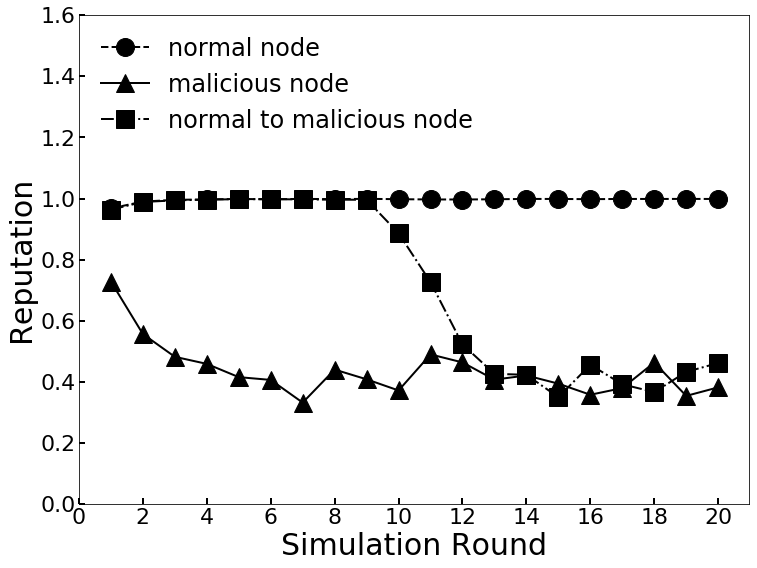

In [2]:
# basic function of Bayesian watchdog
import scipy.special as ss
from scipy.stats import beta
from scipy import integrate
import random

# 节点（正常节点及恶意节点）产生的包转发率
def NodeBehavior(a, b):
    res = random.uniform(a, b)
    return res

# 根据前一轮观察的结果更新alpha, beta
def updateBeta(alpha, beta, observation, discount):
    alpha = discount*alpha + (1 - observation)    # packet loss
    beta = discount*beta + observation            # packet forwarded
    res = [alpha, beta]
    return res

# 计算beta函数的pdf
def BetaPdf(x, alpha, beta):
    res = x**(alpha-1)*(1-x)**(beta-1)/ss.beta(alpha, beta)
    return res

# 计算beta函数的cdf
def BetaCdf(x, alpha, beta):
    beta_cdf = integrate.quad(BetaPdf, 0, x, args=(alpha, beta))[0]
    return beta_cdf

# 计算每轮观察后reputation
def BayesianWatchdog(a, b, alpha, beta, discount, thresh):
    # 节点行为被观测
    observation = NodeBehavior(a, b)
    
    # 根据节点行为更新Beta函数的参数
    updated = updateBeta(alpha, beta, observation, discount)
    alpha = updated[0]
    beta = updated[1]
    
    #计算reputation
    reputation = BetaCdf(thresh, alpha, beta)
    res = {'reputation': reputation, 'alpha': alpha, 'beta': beta}
    return res


import numpy as np
import matplotlib.pyplot as plt

#仿真各种节点行为，根据reputation绘图
def Plot():
    # 参数初始化
    discount = 0.5
    thresh = 0.85
    
    # 绘图大小设置
    plt.figure(figsize=(12, 9))
    
    # 善意节点绘制
    alpha = 1
    beta = 1
    i = 1
    test_round = 21
    x1 = []
    y1 = []
    while i < test_round:
        a = 0.9
        b = 1
        result = BayesianWatchdog(a, b, alpha, beta, discount, thresh)
        rep = result['reputation']
        alpha = result['alpha']
        beta = result['beta']
        x1.append(i)
        y1.append(rep)
        i = i + 1
    plt.plot(x1, y1, linestyle = '--', linewidth=2, marker = 'o', markersize = 18, color = 'k', label='normal node')
    
    # 恶意节点绘制
    alpha = 1
    beta = 1
    i = 1
    test_round = 21
    x2 = []
    y2 = []
    while i < test_round:
        a = 0.1
        b = 0.3
        result = BayesianWatchdog(a, b, alpha, beta, discount, thresh)
        rep = result['reputation']
        alpha = result['alpha']
        beta = result['beta']
        x2.append(i)
        y2.append(rep)
        i = i + 1
    plt.plot(x2, y2, linestyle = '-', linewidth=2, marker = '^', markersize = 18, color = 'k', label='malicious node')
    
    # 节点先潜伏后发动攻击
    alpha = 1
    beta = 1
    i = 1
    normal_round = 10
    malicious_round = 10
    x3 = []
    y3 = []
    while i < normal_round:
        a = 0.9
        b = 1
        result = BayesianWatchdog(a, b, alpha, beta, discount, thresh)
        rep = result['reputation']
        alpha = result['alpha']
        beta = result['beta']
        x3.append(i)
        y3.append(rep)
        i = i + 1
    while i < normal_round + malicious_round +1:
        a = 0.1
        b = 0.3
        result = BayesianWatchdog(a, b, alpha, beta, discount, thresh)
        rep = result['reputation']
        alpha = result['alpha']
        beta = result['beta']
        x3.append(i)
        y3.append(rep)
        i = i + 1
    plt.plot(x3, y3, linestyle = '-.', linewidth=2, marker = 's', markersize = 18, color = 'k', label='normal to malicious node')

    
    plt.legend(loc='upper left', frameon=False, fontsize=24)
    plt.tick_params(direction='in', length=6, width=2, labelsize = 22)
    plt.xticks(np.arange(0, 21, 2))
    plt.yticks(np.arange(0, 1.8, 0.2))
    plt.xlabel('Simulation Round', fontsize=30)
    plt.ylabel('Reputation', fontsize=30)
    plt.savefig('./imgs/bayesian_watchdog.pdf')
    plt.show()
    

if __name__ == '__main__':
    Plot()